In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import math

from google.colab import files
uploaded = files.upload()

Saving typeb_GX339.fits to typeb_GX339.fits


In [ ]:
file_name = "typeb_GX339.fits"

In [ ]:
hdulist = fits.open(file_name)
print(hdulist.info())
time_list = hdulist[1].data["TIME"].tolist()
count_list = hdulist[1].data["COUNTS"].tolist()
hdulist.close()


Filename: typeb_GX339.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  COUNTS        1 BinTableHDU     76   233472R x 4C   [1D, 1D, 1D, 1D]   
  2  STDGTI        1 BinTableHDU     41   1R x 2C   [1D, 1D]   
None


In [ ]:
#fourier transform
tres = time_list[1]-time_list[0]
tlen= time_list[len(time_list)-1]-time_list[0]


numb = len(time_list)
fres = 1/tlen
fmax = 1./(2*tres)
flen = int((fmax-fres)/fres+1)

print(flen)
print(numb)

116735
233472


In [ ]:
print(tlen, tres, numb, fres, fmax, int((fmax-fres)/fres+1))

1823.9921875 0.0078125 233472 0.0005482479622736871 64.0 116735


In [ ]:
freq = np.linspace(fres,fmax,(int((fmax-fres)/fres)+1))

In [ ]:
transf = np.fft.fft(count_list)
print(len(transf))
powspec = 2.0*abs(transf[1:int(flen)+1])*abs(transf[1:int(flen)+1])/sum(np.array(count_list)*tres)
print(len(powspec))

233472
116735


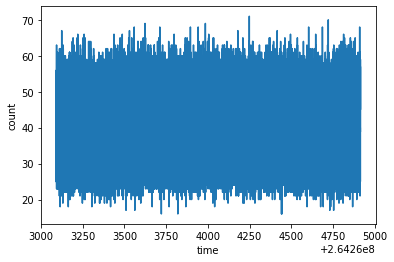

116735 116735


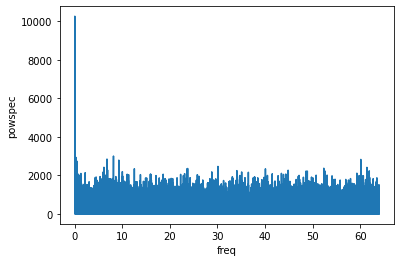

In [ ]:
#plotting

#without FT
plt.plot(time_list, count_list)
plt.ylabel("count")
plt.xlabel("time")
plt.show()


#with FT
print(len(freq), len(powspec))

plt.plot(freq,powspec)
plt.xlabel("freq")
plt.ylabel("powspec")
plt.show()

"""
pro log_rebin,factor,freq,pow,nfreq,f_low,f_high,npow
;rebin a power spectra in approximately equal log bins
;input:  factor = ratio of upper to lower frequency bin edges (try 1.1)
;        freq   = equally spaced frequency array
;        pow    = power at freq
;output: nfreq  = average frequency of bins
;        f_low  = lower frequency edges of bins
;        f_high = upper frequency edges of bins
;        npow   = average power of bins
"""

factor = 1.05

n = len(powspec)
add = 0
if (freq[0] == 0):
  add = 1
istart = 0 + add
df = freq[1]-freq[0]
lowedge = freq[istart]-df/2
ilow=istart
k = 0
nfreq = np.zeros(n)
f_low = np.zeros(n)
f_high = np.zeros(n)
npow = np.repeat(powspec[0], n)
i = istart 
while True:
  if freq[n-1] < lowedge*(factor**1.5):
    i = n-1
  if freq[i]+df/2 > lowedge*factor or i == n-1:
      nfreq[k] = sum(freq[ilow:i])/(i-ilow+1) #: oldugunda sondaki dahil mi bak
      npow[k] = sum(powspec[ilow:i])/(i-ilow+1)
      f_low[k] = freq[ilow]-df/2
      f_high[k] = freq[i]+df/2
      k = k+1
      lowedge = freq[i]+df/2
      ilow = i+1
  i = i+1
  if i >= n:
    break
nfreq = nfreq[0:k-1]
npow = npow[0:k-1]
f_low = f_low[0:k-1]
f_high = f_high[0:k-1]



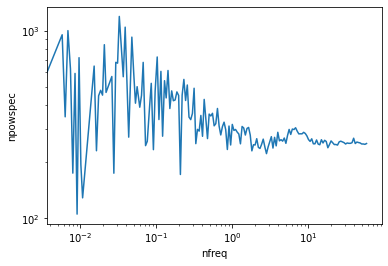

In [ ]:
plt.plot(nfreq,npow)
plt.xlabel("nfreq")
plt.ylabel("npowspec")
plt.yscale("log")
plt.xscale("log")
plt.show()
